In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler

import yfinance as yf

In [59]:
ticker = "MSFT"

In [60]:
yf.download(ticker)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060524,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062686,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063767,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062145,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061065,47894400
...,...,...,...,...,...,...
2023-06-02,334.250000,337.500000,332.549988,335.399994,335.399994,25864000
2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993,20396200


In [61]:
df = yf.download(ticker, start="2020-01-01", end="2023-06-09")

[*********************100%***********************]  1 of 1 completed


In [62]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,155.422043,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.486771,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.883499,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.480423,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.909195,27746500
...,...,...,...,...,...,...
2023-06-02,334.250000,337.500000,332.549988,335.399994,335.399994,25864000
2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993,20396200


In [63]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,158.779999,160.729996,158.330002,160.619995,155.422043,22622100
2020-01-03,158.320007,159.949997,158.059998,158.619995,153.486771,21116200
2020-01-06,157.080002,159.100006,156.509995,159.029999,153.883499,20813700
2020-01-07,159.320007,159.669998,157.320007,157.580002,152.480423,21634100
2020-01-08,158.929993,160.800003,157.949997,160.089996,154.909195,27746500


In [64]:
df.reset_index(inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,158.779999,160.729996,158.330002,160.619995,155.422043,22622100
1,2020-01-03,158.320007,159.949997,158.059998,158.619995,153.486771,21116200
2,2020-01-06,157.080002,159.100006,156.509995,159.029999,153.883499,20813700
3,2020-01-07,159.320007,159.669998,157.320007,157.580002,152.480423,21634100
4,2020-01-08,158.929993,160.800003,157.949997,160.089996,154.909195,27746500
...,...,...,...,...,...,...,...
860,2023-06-02,334.250000,337.500000,332.549988,335.399994,335.399994,25864000
861,2023-06-05,335.220001,338.559998,334.660004,335.940002,335.940002,21307100
862,2023-06-06,335.329987,335.369995,332.170013,333.679993,333.679993,20396200
863,2023-06-07,331.649994,334.489990,322.500000,323.380005,323.380005,40717100


In [65]:
## visualizations
import nbformat
fig = px.line(df, x = df['Date'], y = df['Open'], title='Open price of the given stock')
fig.show()

In [66]:
## closing price

fig = px.line(df, x = df['Date'], y = df['Close'], title="Closing price")
fig

In [67]:
## making the candle stick chart for the given ticker symbol
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open = df['Open'],
                high = df['High'],
                low = df['Low'],
                close = df['Close'])])
fig.show()

In [68]:
## just taking the Adj Close

df1 = df.reset_index()['Adj Close']

In [69]:
df1

0      155.422043
1      153.486771
2      153.883499
3      152.480423
4      154.909195
          ...    
860    335.399994
861    335.940002
862    333.679993
863    323.380005
864    325.260010
Name: Adj Close, Length: 865, dtype: float64

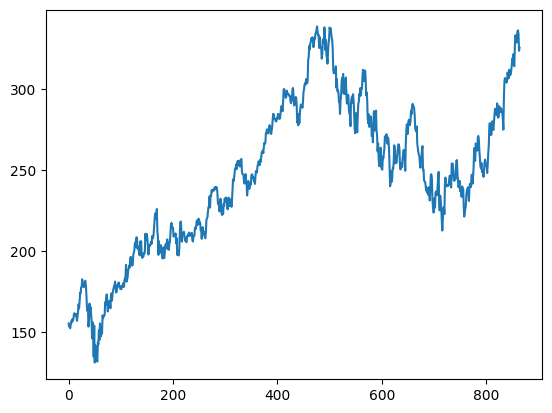

In [70]:
## plotting the adj close
plt.plot(df1)

In [71]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [72]:
print(df1)


[[0.11610384]
 [0.10675201]
 [0.10866913]
 [0.10188903]
 [0.1136256 ]
 [0.12297744]
 [0.11947052]
 [0.12854179]
 [0.1231645 ]
 [0.12807416]
 [0.14205516]
 [0.14640413]
 [0.14359821]
 [0.13985755]
 [0.14462697]
 [0.13677137]
 [0.1238658 ]
 [0.13873538]
 [0.15079926]
 [0.17296302]
 [0.16103968]
 [0.18044464]
 [0.20728446]
 [0.20625578]
 [0.22369695]
 [0.2249127 ]
 [0.24740384]
 [0.22748436]
 [0.228747  ]
 [0.22407094]
 [0.23173947]
 [0.24053025]
 [0.24315596]
 [0.22974626]
 [0.20241101]
 [0.16630813]
 [0.15308609]
 [0.16293216]
 [0.10671477]
 [0.12467239]
 [0.17521681]
 [0.13639414]
 [0.16471398]
 [0.14464643]
 [0.1226095 ]
 [0.07126829]
 [0.1195618 ]
 [0.08538135]
 [0.01706689]
 [0.1097624 ]
 [0.        ]
 [0.0522789 ]
 [0.02334972]
 [0.03418075]
 [0.00904922]
 [0.00262571]
 [0.06057809]
 [0.05392017]
 [0.09700916]
 [0.06695463]
 [0.1163266 ]
 [0.1045112 ]
 [0.0782544 ]
 [0.09302385]
 [0.08631911]
 [0.13995761]
 [0.13161182]
 [0.13930115]
 [0.13934819]
 [0.14108289]
 [0.17948357]
 [0.17

In [73]:
## splitting of the dataset
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [74]:
training_size,test_size

(648, 217)

In [75]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [76]:
time_step = 25
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [77]:
print(X_train.shape), print(y_train.shape)

(622, 25)
(622,)


(None, None)

In [78]:
print(X_test.shape), print(ytest.shape)

(191, 25)
(191,)


(None, None)

In [79]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [80]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [81]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(25,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 25, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 25, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [83]:
## fitting the model
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=30,batch_size=64,verbose=1)

Epoch 1/30
10/10 [==============================] - 5s 129ms/step - loss: 0.1362 - val_loss: 0.0329
Epoch 2/30
10/10 [==============================] - 0s 31ms/step - loss: 0.0178 - val_loss: 0.0169
Epoch 3/30
10/10 [==============================] - 0s 32ms/step - loss: 0.0089 - val_loss: 0.0073
Epoch 4/30
10/10 [==============================] - 0s 32ms/step - loss: 0.0056 - val_loss: 0.0065
Epoch 5/30
10/10 [==============================] - 0s 32ms/step - loss: 0.0039 - val_loss: 0.0050
Epoch 6/30
10/10 [==============================] - 0s 33ms/step - loss: 0.0031 - val_loss: 0.0046
Epoch 7/30
10/10 [==============================] - 0s 32ms/step - loss: 0.0029 - val_loss: 0.0048
Epoch 8/30
10/10 [==============================] - 0s 33ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 9/30
10/10 [==============================] - 0s 33ms/step - loss: 0.0029 - val_loss: 0.0046
Epoch 10/30
10/10 [==============================] - 0s 32ms/step - loss: 0.0028 - val_loss: 0.0046
Epoch 11

In [84]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 7ms/step


In [85]:
## Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [86]:
## on training data
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 
math.sqrt(mean_squared_error(y_train,train_predict))

247.17734637890047

In [87]:
X_train_prediction = model.predict(X_train)
print(X_train)

20/20 [==============================] - 0s 7ms/step
[[[0.11610384]
  [0.10675201]
  [0.10866913]
  ...
  [0.20728446]
  [0.20625578]
  [0.22369695]]

 [[0.10675201]
  [0.10866913]
  [0.10188903]
  ...
  [0.20625578]
  [0.22369695]
  [0.2249127 ]]

 [[0.10866913]
  [0.10188903]
  [0.1136256 ]
  ...
  [0.22369695]
  [0.2249127 ]
  [0.24740384]]

 ...

 [[0.53749415]
  [0.55032075]
  [0.57946775]
  ...
  [0.62029263]
  [0.63259269]
  [0.61115124]]

 [[0.55032075]
  [0.57946775]
  [0.57654828]
  ...
  [0.63259269]
  [0.61115124]
  [0.60382874]]

 [[0.57946775]
  [0.57654828]
  [0.60397223]
  ...
  [0.61115124]
  [0.60382874]
  [0.57066141]]]


In [88]:
## test dataset prediction value
X_test_prediction = model.predict(X_test)
print(X_test_prediction)

6/6 [==============================] - 0s 7ms/step
[[0.70444447]
 [0.6954063 ]
 [0.68566364]
 [0.6758404 ]
 [0.66627306]
 [0.65774024]
 [0.6506891 ]
 [0.6442572 ]
 [0.6381119 ]
 [0.63163614]
 [0.6247623 ]
 [0.61745685]
 [0.6097824 ]
 [0.60169834]
 [0.5934846 ]
 [0.5851848 ]
 [0.5769573 ]
 [0.56893706]
 [0.5614843 ]
 [0.55457723]
 [0.54792005]
 [0.5421278 ]
 [0.5377756 ]
 [0.53505504]
 [0.533743  ]
 [0.53276795]
 [0.5313525 ]
 [0.528907  ]
 [0.5252595 ]
 [0.52116376]
 [0.5165894 ]
 [0.51234454]
 [0.50901526]
 [0.50641155]
 [0.50456923]
 [0.50370157]
 [0.5041461 ]
 [0.5061264 ]
 [0.5082704 ]
 [0.5095888 ]
 [0.5103706 ]
 [0.5104403 ]
 [0.50959593]
 [0.50729275]
 [0.5032729 ]
 [0.49810645]
 [0.4925044 ]
 [0.48707145]
 [0.48197326]
 [0.4784992 ]
 [0.4774045 ]
 [0.47826892]
 [0.48074278]
 [0.48440278]
 [0.4887702 ]
 [0.49365455]
 [0.49860623]
 [0.50372034]
 [0.50907964]
 [0.514566  ]
 [0.51960236]
 [0.5238878 ]
 [0.52829593]
 [0.5333199 ]
 [0.5387635 ]
 [0.5440504 ]
 [0.54879004]
 [0.5526748

In [89]:
## calculating the r2 score for the LSTM model
from sklearn.metrics import r2_score
training_data_accuracy = r2_score(y_train, X_train_prediction)
print(training_data_accuracy*100)

95.93296249171021


In [90]:

len(test_data)

217

In [95]:
x_input=test_data[192:].reshape(1,-1)
x_input.shape


(1, 25)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:

temp_input

[0.8376726112698752,
 0.8629387049110352,
 0.8532951768571252,
 0.8453392993934766,
 0.8709428051764153,
 0.8603348210878753,
 0.854838159042192,
 0.8572007813863524,
 0.8681944004184029,
 0.8824013981958035,
 0.9042433779733431,
 0.9033735978980756,
 0.9170973353657695,
 0.8884901536633586,
 0.8816765814664141,
 0.9400025763068692,
 0.9736837700556898,
 0.9655653802755025,
 0.9519383833519551,
 0.9721856188544961,
 0.9858127632483852,
 0.988422250944529,
 0.9775011873205884,
 0.9277284722979543,
 0.9368132352272137]

In [102]:
from numpy import array

lst_output = []
n_steps = 20
i = 0

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i = i + 1
    else:
        x_input = np.array(temp_input)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat[0]))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i = i + 1

print(lst_output)


ValueError: cannot reshape array of size 25 into shape (1,20,1)